In [1]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet('/kaggle/input/visual-taxonomy/category_attributes.parquet', engine='pyarrow')  # or engine='fastparquet'

# Display the DataFrame
print(df)

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                      Attribute_list  
0  [color, neck, pattern, print_or_pattern_type, ...  
1  [blouse_pattern, border, border_width, color, ...  
2  [color, fit_shape, length, occasion, ornamenta...  
3  [color, fit_shape, length, pattern, print_or_p...  
4  [color, fit_shape, length, neck_collar, ocassi...  


In [2]:
import pandas as pd

# Set Pandas options to display more data
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.max_colwidth', None)  # Display full content in each column

# Assuming your DataFrame is already loaded
print(df)  # or df.head() if you just want the top few rows

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                                                                                                        Attribute_list  
0                                                                         [color, neck, pattern, print_or_pattern_type, sleeve_length]  
1  [blouse_pattern, border, border_width, color, occasion, ornamentation, pallu_details, pattern, print_or_pattern_type, transparency]  
2                   [color, fit_shape, length, occasion, ornamentation, pattern, print_or_pattern_type, sleeve_length, sleeve_styling]  
3                           [color, fit_shape, length, pattern, print_or_pattern_type, sleeve_length, sleeve_styling, surface_styling]  
4    [color, fit_shape, length, neck_collar, ocassion, p

# **Correcting just Women Tshirts data**

Loaded csv file.
   id     Category  len      attr_1 attr_2   attr_3   attr_4         attr_5  \
0   0  Men Tshirts    5     default  round  printed  default  short sleeves   
1   1  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
2   2  Men Tshirts    5     default   polo    solid    solid  short sleeves   
3   3  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
4   4  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   

  attr_6 attr_7 attr_8 attr_9 attr_10  
0    NaN    NaN    NaN    NaN     NaN  
1    NaN    NaN    NaN    NaN     NaN  
2    NaN    NaN    NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN     NaN  


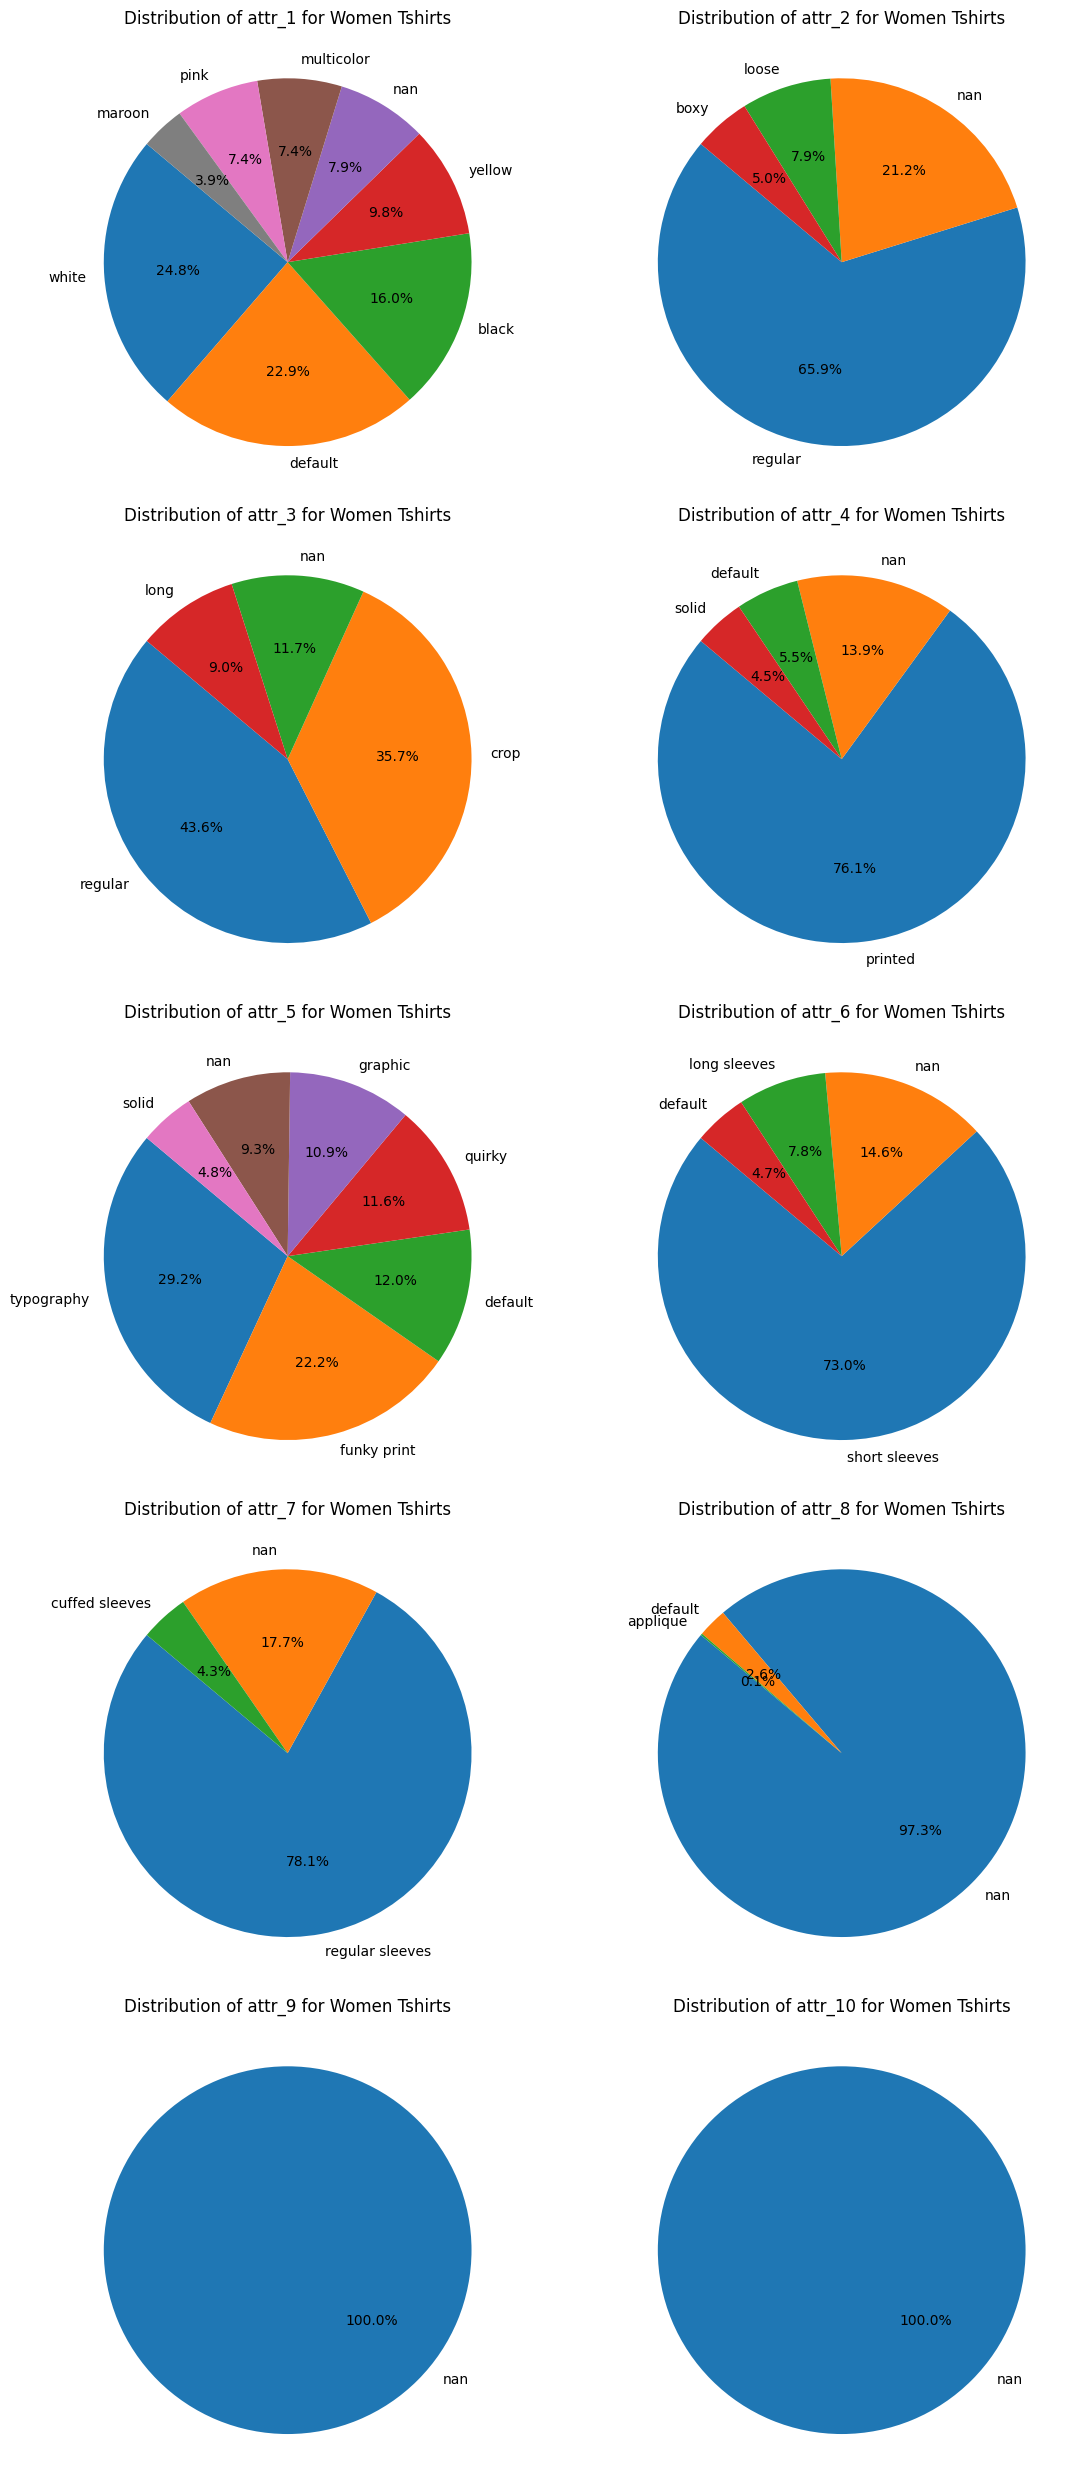

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Load the data
data = pd.read_csv('/kaggle/input/visual-taxonomy/train.csv')
print("Loaded csv file.")
print(data.head())

# Specify the target category
target_category = "Women Tshirts"

# Filter data to include only the specified category
filtered_data = data[data['Category'] == target_category]

# Function to generate a unique color map based on the number of categories in a column
def generate_colors(n):
    color_list = list(mcolors.TABLEAU_COLORS)  # Use Tableau colors for variety
    if n <= len(color_list):
        return color_list[:n]
    else:
        return plt.cm.get_cmap('hsv', n)(range(n))  # Generate unique colors if categories exceed standard colors

# Loop through each column in the filtered data to generate pie charts
columns_to_plot = [column for column in filtered_data.columns if column not in ['id', 'Category','len']]
num_attributes = len(columns_to_plot)  # Calculate number of attributes to plot
num_rows = (num_attributes + 1) // 2  # Calculate number of rows needed (2 columns)

# Create a figure with a 2-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each column to generate pie charts
for i, column in enumerate(columns_to_plot):
    # Calculate value counts for the column, including missing values
    value_counts = filtered_data[column].value_counts(dropna=False)
    if value_counts.isnull().any():
        value_counts.index = value_counts.index.fillna('Missing')  # Label missing values as 'Missing'

    # Generate a unique color map for each pie chart
    colors = generate_colors(len(value_counts))

    # Plot pie chart on the corresponding axes
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f"Distribution of {column} for {target_category}")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Load and preprocess the data
train_csv_path = '/kaggle/input/visual-taxonomy/train.csv'
train_img_dir = '/kaggle/input/visual-taxonomy/train_images/'

# Load the labels from train.csv
data = pd.read_csv(train_csv_path)

# Filter data for "Men Tshirts" category and select the first 8 columns for attributes
target_category = "Women Tshirts"
df = data[data['Category'] == target_category]

df['image_path'] = df['id'].apply(lambda x: os.path.join(train_img_dir, f"{x:06d}.jpg"))
df = df.drop(['Category','len','attr_9','attr_10'], axis=1)
df.rename(columns={'attr_1': 'color', 'attr_2': 'fit_shape','attr_3': 'length','attr_4': 'pattern','attr_5': 'print_or_pattern_type','attr_6': 'sleeve_length','attr_7': 'sleeve_styling','attr_8': 'surface_styling'}, inplace=True)
# df = df.fillna('dummy_value')
# df = df.dropna()
print("Done")

Done


/tmp/ipykernel_30/3120694393.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_path'] = df['id'].apply(lambda x: os.path.join(train_img_dir, f"{x:06d}.jpg"))


In [5]:
df.head()

,id,color,fit_shape,length,pattern,print_or_pattern_type,sleeve_length,sleeve_styling,surface_styling,image_path
32435,32601,multicolor,loose,long,default,default,default,regular sleeves,NaN,/kaggle/input/visual-taxonomy/train_images/032601.jpg
32436,32602,yellow,loose,long,default,default,long sleeves,regular sleeves,NaN,/kaggle/input/visual-taxonomy/train_images/032602.jpg
32437,32603,multicolor,loose,long,default,default,default,regular sleeves,NaN,/kaggle/input/visual-taxonomy/train_images/032603.jpg
32438,32604,multicolor,loose,long,default,default,long sleeves,regular sleeves,NaN,/kaggle/input/visual-taxonomy/train_images/032604.jpg
32439,32605,multicolor,loose,long,default,default,default,regular sleeves,NaN,/kaggle/input/visual-taxonomy/train_images/032605.jpg


In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                           0
color                     1489
fit_shape                 3973
length                    2194
pattern                   2613
print_or_pattern_type     1740
sleeve_length             2733
sleeve_styling            3314
surface_styling          18264
image_path                   0
dtype: int64


In [7]:
df.shape

(18774, 10)

**Good chunk of data is missing**

In [8]:
train_df=df

In [9]:
# Function to load and preprocess image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Example function to create a CNN-based model for imputation
def create_imputer_model(output_classes):
    base_model = tf.keras.applications.ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze backbone for initial training
    
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(output_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Dictionary to store mappings for each categorical column
label_mappings = {}
categorical_columns = ['color', 'fit_shape', 'length', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling'] 

# Loop over each categorical column, encode, and store mapping
for col in categorical_columns:
    le = LabelEncoder()
    
    # Fit and transform only non-missing values
    non_missing = train_df[col].dropna()
    train_df.loc[train_df[col].notna(), col] = le.fit_transform(non_missing)
    
    # Store the mapping of classes to integer labels
    label_mappings[col] = dict(enumerate(le.classes_))
    
    # Ensure missing values are restored as NaN in the DataFrame
    train_df[col] = train_df[col].astype(float)  # Ensure NaN compatibility
    train_df.loc[train_df[col].isnull(), col] = np.nan
    
print("Encoded DataFrame:")
print(train_df.head())
print("\nLabel Mappings:")
print(label_mappings)

Encoded DataFrame:
          id  color  fit_shape  length  pattern  print_or_pattern_type  \
32435  32601    3.0        1.0     1.0      0.0                    0.0   
32436  32602    6.0        1.0     1.0      0.0                    0.0   
32437  32603    3.0        1.0     1.0      0.0                    0.0   
32438  32604    3.0        1.0     1.0      0.0                    0.0   
32439  32605    3.0        1.0     1.0      0.0                    0.0   

       sleeve_length  sleeve_styling  surface_styling  \
32435            0.0             1.0              NaN   
32436            1.0             1.0              NaN   
32437            0.0             1.0              NaN   
32438            1.0             1.0              NaN   
32439            0.0             1.0              NaN   

                                                  image_path  
32435  /kaggle/input/visual-taxonomy/train_images/032601.jpg  
32436  /kaggle/input/visual-taxonomy/train_images/032602.jpg  
3243

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from tensorflow.keras.backend import clear_session

In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Constants for image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# For each attribute, filter data, train model, and impute missing values
for attribute in ['color', 'fit_shape', 'length', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling']:
    # Filter data for attribute (only rows where this attribute is not missing)
    subset = train_df.dropna(subset=[attribute])
    
    # Limit the number of rows to 10,000 if it exceeds that count
    if len(subset) > 8000:
        subset = subset.sample(n=8000, random_state=42)
        print("triggered")
    
    # Load and preprocess images
    X = np.array([preprocess_image(img_path) for img_path in subset['image_path']])
    y = subset[attribute].values
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the CNN-based model
    model = create_imputer_model(output_classes=len(label_mappings[attribute]))
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=BATCH_SIZE)
    
    
    
    # Impute missing values
    missing_subset = train_df[train_df[attribute].isnull()]
    batch_size = len(missing_subset)//20  # Adjust batch size according to available memory

    if not missing_subset.empty:
        print("Starting prediction for missing values...")

        # Initialize an empty list to collect predictions
        y_missing_pred = []

        # Process X_missing in batches
        for start in range(0, len(missing_subset), batch_size):
            end = min(start + batch_size, len(missing_subset))

            print(f"Processing batch from {start} to {end}")

            # Preprocess the images in the current batch
            X_batch = np.array([preprocess_image(img_path) for img_path in missing_subset['image_path'][start:end]])

            # Predict for the current batch
            y_batch_pred = model.predict(X_batch).argmax(axis=1)

            # Append the batch predictions to the main list
            y_missing_pred.extend(y_batch_pred)

    # Convert to numpy array if needed, then update the DataFrame
    y_missing_pred = np.array(y_missing_pred)

    print(f"Predicted: {attribute}")
    train_df.loc[train_df[attribute].isnull(), attribute] = y_missing_pred
        
# Now train the final model on the fully imputed dataset with images and attributes

triggered
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


I0000 00:00:1730841357.528255     107 service.cc:145] XLA service 0x59e8a48c93c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730841357.528315     107 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730841357.528321     107 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/200 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.2266 - loss: 2.1481 

I0000 00:00:1730841363.377673     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 121ms/step - accuracy: 0.5790 - loss: 1.2072 - val_accuracy: 0.7200 - val_loss: 0.8122
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.7594 - loss: 0.6610 - val_accuracy: 0.7387 - val_loss: 0.7263
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - accuracy: 0.8141 - loss: 0.5335 - val_accuracy: 0.7713 - val_loss: 0.6570
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.8337 - loss: 0.4555 - val_accuracy: 0.7544 - val_loss: 0.6974
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.8519 - loss: 0.4007 - val_accuracy: 0.7812 - val_loss: 0.6463
Starting prediction for missing values...
Processing batch from 0 to 74
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step 
Processing batch from 74 to 148
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing batch from 148 to 222
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing batch from 222 to 296
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Processing batch from 296 to 370
3/3 ━━━━━━

In [13]:
missing_values = train_df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                       0
color                    0
fit_shape                0
length                   0
pattern                  0
print_or_pattern_type    0
sleeve_length            0
sleeve_styling           0
surface_styling          0
image_path               0
dtype: int64


In [14]:
label_mappings

{'color': {0: 'black',
  1: 'default',
  2: 'maroon',
  3: 'multicolor',
  4: 'pink',
  5: 'white',
  6: 'yellow'},
 'fit_shape': {0: 'boxy', 1: 'loose', 2: 'regular'},
 'length': {0: 'crop', 1: 'long', 2: 'regular'},
 'pattern': {0: 'default', 1: 'printed', 2: 'solid'},
 'print_or_pattern_type': {0: 'default',
  1: 'funky print',
  2: 'graphic',
  3: 'quirky',
  4: 'solid',
  5: 'typography'},
 'sleeve_length': {0: 'default', 1: 'long sleeves', 2: 'short sleeves'},
 'sleeve_styling': {0: 'cuffed sleeves', 1: 'regular sleeves'},
 'surface_styling': {0: 'applique', 1: 'default'}}

In [15]:
# Convert float columns to int before mapping
for column, mapping in label_mappings.items():
    train_df[column] = train_df[column].astype(int).map(mapping)

In [16]:
train_df.head()

,id,color,fit_shape,length,pattern,print_or_pattern_type,sleeve_length,sleeve_styling,surface_styling,image_path
32435,32601,multicolor,loose,long,default,default,default,regular sleeves,default,/kaggle/input/visual-taxonomy/train_images/032601.jpg
32436,32602,yellow,loose,long,default,default,long sleeves,regular sleeves,default,/kaggle/input/visual-taxonomy/train_images/032602.jpg
32437,32603,multicolor,loose,long,default,default,default,regular sleeves,default,/kaggle/input/visual-taxonomy/train_images/032603.jpg
32438,32604,multicolor,loose,long,default,default,long sleeves,regular sleeves,default,/kaggle/input/visual-taxonomy/train_images/032604.jpg
32439,32605,multicolor,loose,long,default,default,default,regular sleeves,default,/kaggle/input/visual-taxonomy/train_images/032605.jpg


# **Checking model accuracy after imputation**

In [17]:
df=train_df

In [18]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store mappings for each categorical column
label_mappings = {}
categorical_columns = ['color', 'fit_shape', 'length', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling']
# Loop over each categorical column, encode, and store mapping
for col in categorical_columns:
    le = LabelEncoder()
    # Fit and transform the column to integer codes
    df[col] = le.fit_transform(df[col])
    
    # Store the mapping of classes to integer labels
    label_mappings[col] = dict(enumerate(le.classes_))

print("Encoded DataFrame:")
print(df.head())
print("\nLabel Mappings:")
print(label_mappings)

Encoded DataFrame:
          id  color  fit_shape  length  pattern  print_or_pattern_type  \
32435  32601      3          1       1        0                      0   
32436  32602      6          1       1        0                      0   
32437  32603      3          1       1        0                      0   
32438  32604      3          1       1        0                      0   
32439  32605      3          1       1        0                      0   

       sleeve_length  sleeve_styling  surface_styling  \
32435              0               1                1   
32436              1               1                1   
32437              0               1                1   
32438              1               1                1   
32439              0               1                1   

                                                  image_path  
32435  /kaggle/input/visual-taxonomy/train_images/032601.jpg  
32436  /kaggle/input/visual-taxonomy/train_images/032602.jpg  
3243

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Split the data for training and validation
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Define image parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Standard image size for CNN models
BATCH_SIZE = 32

# Data generator for real-time data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train and validation data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_img_dir,
    x_col='image_path',
    y_col=['color', 'fit_shape', 'length', 'pattern', 
           'print_or_pattern_type', 'sleeve_length', 
           'sleeve_styling', 'surface_styling'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='multi_output'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_img_dir,
    x_col='image_path',
    y_col=['color', 'fit_shape', 'length', 'pattern', 
           'print_or_pattern_type', 'sleeve_length', 
           'sleeve_styling', 'surface_styling'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='multi_output'
)

# Model Architecture
def build_model():
    # Shared Backbone
    base_model = tf.keras.applications.ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the backbone initially

    # Global feature extractor
    x = layers.GlobalAveragePooling2D()(base_model.output)

    # Attribute-specific heads
    color_head = layers.Dense(128, activation='relu')(x)
    color_head = layers.Dense(num_classes['color'], activation='softmax', name='color')(color_head)
    
    fit_shape_head = layers.Dense(128, activation='relu')(x)
    fit_shape_head = layers.Dense(num_classes['fit_shape'], activation='softmax', name='fit_shape')(fit_shape_head)
    
    length_head = layers.Dense(128, activation='relu')(x)
    length_head = layers.Dense(num_classes['length'], activation='softmax', name='length')(length_head)
    
    pattern_head = layers.Dense(128, activation='relu')(x)
    pattern_head = layers.Dense(num_classes['pattern'], activation='softmax', name='pattern')(pattern_head)
    
    print_type_head = layers.Dense(128, activation='relu')(x)
    print_type_head = layers.Dense(num_classes['print_or_pattern_type'], activation='softmax', name='print_or_pattern_type')(print_type_head)
    
    sleeve_length_head = layers.Dense(128, activation='relu')(x)
    sleeve_length_head = layers.Dense(num_classes['sleeve_length'], activation='softmax', name='sleeve_length')(sleeve_length_head)
    
    sleeve_styling_head = layers.Dense(128, activation='relu')(x)
    sleeve_styling_head = layers.Dense(num_classes['sleeve_styling'], activation='softmax', name='sleeve_styling')(sleeve_styling_head)
    
    surface_styling_head = layers.Dense(128, activation='relu')(x)
    surface_styling_head = layers.Dense(num_classes['surface_styling'], activation='softmax', name='surface_styling')(surface_styling_head)

    # Define the model
    model = models.Model(inputs=base_model.input, outputs=[
        color_head, fit_shape_head, length_head, pattern_head, 
        print_type_head, sleeve_length_head, sleeve_styling_head, 
        surface_styling_head
    ])
    
    return model

# Number of classes for each attribute
num_classes = {
    'color': df['color'].nunique(),
    'fit_shape': df['fit_shape'].nunique(),
    'length': df['length'].nunique(),
    'pattern': df['pattern'].nunique(),
    'print_or_pattern_type': df['print_or_pattern_type'].nunique(),
    'sleeve_length': df['sleeve_length'].nunique(),
    'sleeve_styling': df['sleeve_styling'].nunique(),
    'surface_styling': df['surface_styling'].nunique()
}

# Instantiate and compile the model
model = build_model()

Found 16896 validated image filenames.
Found 1878 validated image filenames.


In [20]:
import tensorflow as tf

def create_dataset(dataframe, batch_size):
    def generator():
        for _, row in dataframe.iterrows():
            # Load and preprocess the image
            img = tf.io.read_file(row['image_path'])
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
            img = img / 255.0  # Normalize to [0,1]

            # Labels as a tuple of individual attributes for the Saree dataset
            labels = (
                row['color'],
                row['fit_shape'],
                row['length'],
                row['pattern'],
                row['print_or_pattern_type'],
                row['sleeve_length'],
                row['sleeve_styling'],
                row['surface_styling']
            )
            yield img, labels

    # Set the output signature for TensorFlow to understand the data types and shapes
    output_signature = (
        tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32),  # Image shape and dtype
        (
            tf.TensorSpec(shape=(), dtype=tf.int32),  # color
            tf.TensorSpec(shape=(), dtype=tf.int32),  # neck
            tf.TensorSpec(shape=(), dtype=tf.int32),  # pattern
            tf.TensorSpec(shape=(), dtype=tf.int32),  # print_or_pattern_type
            tf.TensorSpec(shape=(), dtype=tf.int32),  # sleeve_length
            tf.TensorSpec(shape=(), dtype=tf.int32),  # color
            tf.TensorSpec(shape=(), dtype=tf.int32),  # neck
            tf.TensorSpec(shape=(), dtype=tf.int32),  # pattern
        )
    )

    # Create the dataset from the generator
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Create train and validation datasets
train_dataset = create_dataset(train_df, BATCH_SIZE)
val_dataset = create_dataset(val_df, BATCH_SIZE)

In [21]:
train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()

In [22]:
# Phase 1: Unfreeze the backbone and all layers
for layer in model.layers:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning on the Saree dataset
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss={
        'color': 'sparse_categorical_crossentropy',
        'fit_shape': 'sparse_categorical_crossentropy',
        'length': 'sparse_categorical_crossentropy',
        'pattern': 'sparse_categorical_crossentropy',
        'print_or_pattern_type': 'sparse_categorical_crossentropy',
        'sleeve_length': 'sparse_categorical_crossentropy',
        'sleeve_styling': 'sparse_categorical_crossentropy',
        'surface_styling': 'sparse_categorical_crossentropy'
    },
    metrics={
        'color': ['accuracy'],
        'fit_shape': ['accuracy'],
        'length': ['accuracy'],
        'pattern': ['accuracy'],
        'print_or_pattern_type': ['accuracy'],
        'sleeve_length': ['accuracy'],
        'sleeve_styling': ['accuracy'],
        'surface_styling': ['accuracy']
    }
)

initial_epochs = 10

history_phase1 = model.fit(
    train_dataset,
    epochs=initial_epochs,
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    validation_data=val_dataset,
    validation_steps=len(val_df) // BATCH_SIZE,
    verbose=1
)

Epoch 1/10


I0000 00:00:1730842820.704931     107 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_34', 20 bytes spill stores, 20 bytes spill loads



528/528 ━━━━━━━━━━━━━━━━━━━━ 297s 448ms/step - color_accuracy: 0.7056 - fit_shape_accuracy: 0.8674 - length_accuracy: 0.8095 - loss: 3.3175 - pattern_accuracy: 0.9156 - print_or_pattern_type_accuracy: 0.6225 - sleeve_length_accuracy: 0.9294 - sleeve_styling_accuracy: 0.9728 - surface_styling_accuracy: 0.9755 - val_color_accuracy: 0.3141 - val_fit_shape_accuracy: 0.8648 - val_length_accuracy: 0.4844 - val_loss: 6.4582 - val_pattern_accuracy: 0.8001 - val_print_or_pattern_type_accuracy: 0.3044 - val_sleeve_length_accuracy: 0.9062 - val_sleeve_styling_accuracy: 0.9440 - val_surface_styling_accuracy: 0.9968
Epoch 2/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 237s 449ms/step - color_accuracy: 0.8659 - fit_shape_accuracy: 0.9161 - length_accuracy: 0.9102 - loss: 1.6316 - pattern_accuracy: 0.9765 - print_or_pattern_type_accuracy: 0.7902 - sleeve_length_accuracy: 0.9644 - sleeve_styling_accuracy: 0.9876 - surface_styling_accuracy: 0.9970 - val_color_accuracy: 0.8180 - val_fit_shape_accuracy: 0.8982 - val_

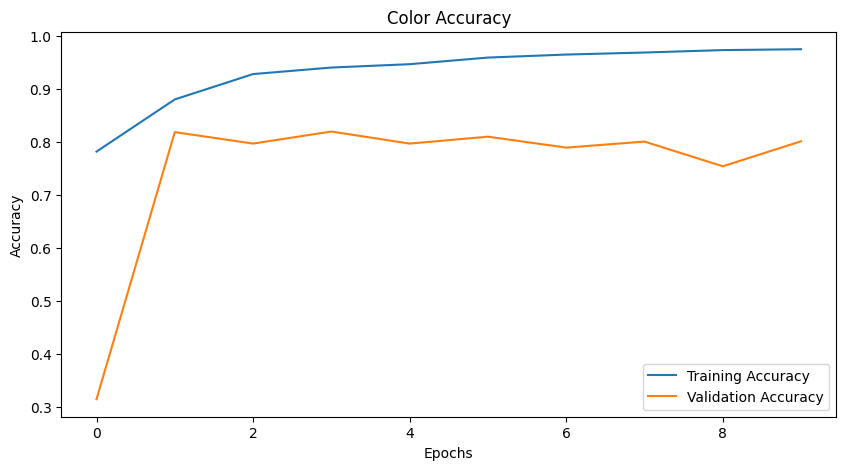

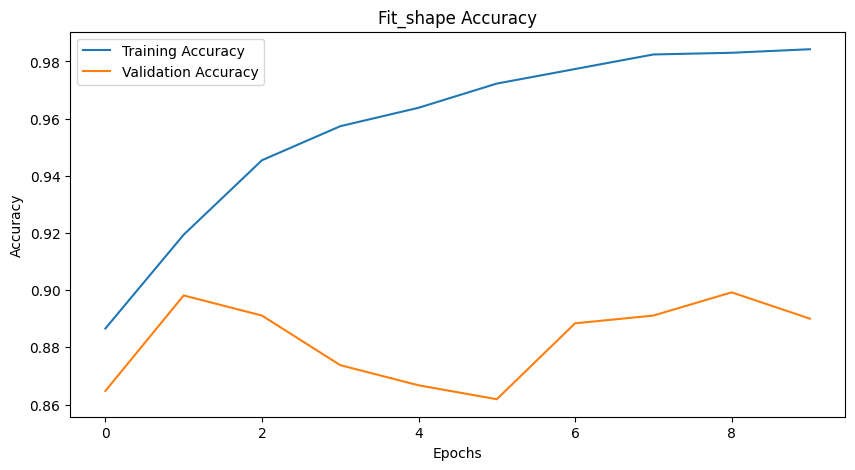

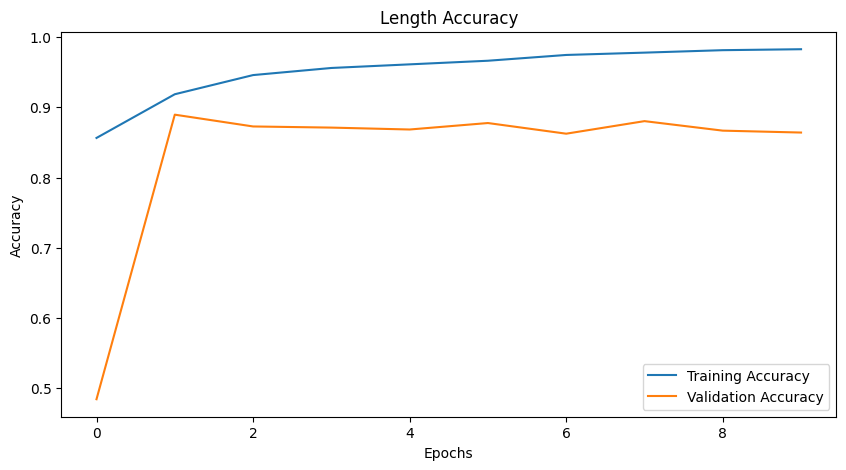

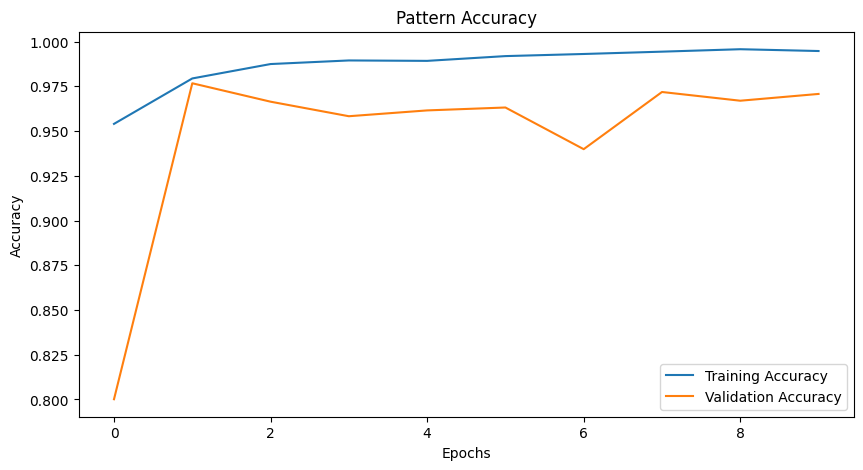

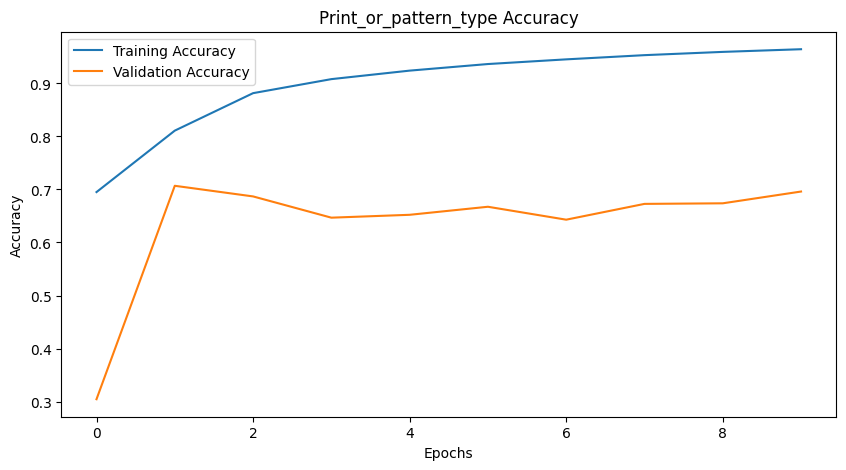

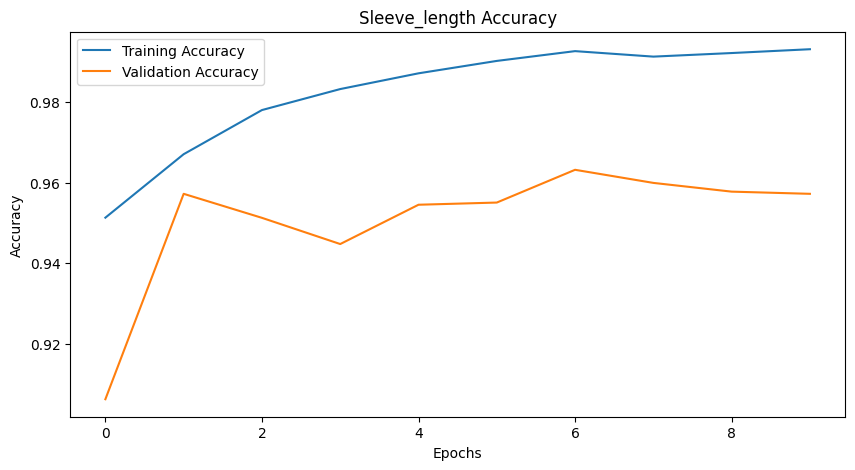

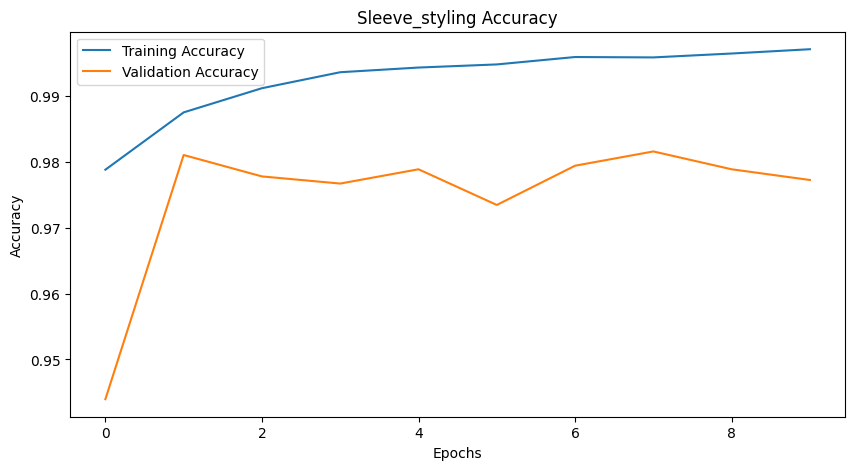

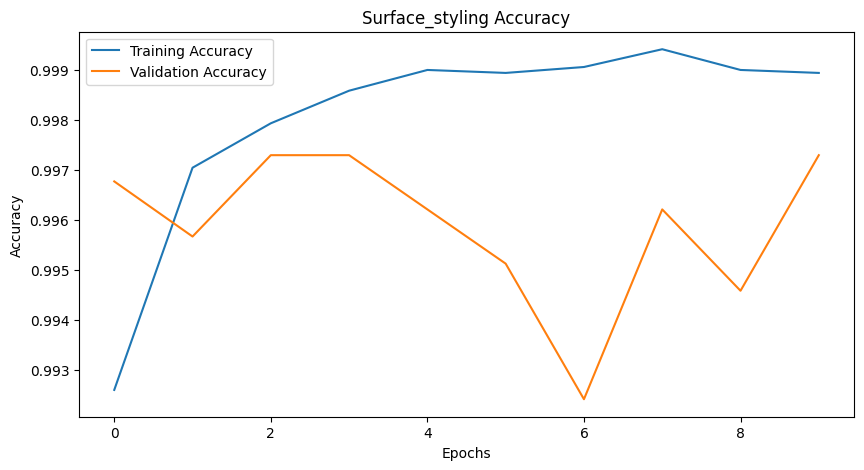

In [23]:
import matplotlib.pyplot as plt

# Define the names for each output
output_names =  ['color', 'fit_shape','length', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling'] 

# Create a plot for each output
for output_name in output_names:
    plt.figure(figsize=(10, 5))
    
    # Plot training accuracy
    plt.plot(history_phase1.history[f'{output_name}_accuracy'], label='Training Accuracy')
    
    # Plot validation accuracy
    plt.plot(history_phase1.history[f'val_{output_name}_accuracy'], label='Validation Accuracy')
    
    # Set plot title and labels
    plt.title(f'{output_name.capitalize()} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Show the plot
    plt.show()

In [25]:
import pandas as pd
import tensorflow as tf

# Load the test.csv and filter for the target category
test_csv_path = '/kaggle/input/visual-taxonomy/test.csv'
test_img_dir = '/kaggle/input/visual-taxonomy/test_images/'

# Load and filter the data
test_data = pd.read_csv(test_csv_path)
test_data = test_data[test_data['Category'] == target_category]

# Create image paths
test_data['image_path'] = test_data['id'].apply(lambda x: os.path.join(test_img_dir, f"{x:06d}.jpg"))

In [26]:
test_data.head()

,id,Category,image_path
13349,13615,Women Tshirts,/kaggle/input/visual-taxonomy/test_images/013615.jpg
13350,13616,Women Tshirts,/kaggle/input/visual-taxonomy/test_images/013616.jpg
13351,13617,Women Tshirts,/kaggle/input/visual-taxonomy/test_images/013617.jpg
13352,13618,Women Tshirts,/kaggle/input/visual-taxonomy/test_images/013618.jpg
13353,13619,Women Tshirts,/kaggle/input/visual-taxonomy/test_images/013619.jpg


In [27]:
# Function to create a dataset from test images
def create_test_dataset(dataframe, batch_size):
    def generator():
        for _, row in dataframe.iterrows():
            # Load and preprocess the image
            img = tf.io.read_file(row['image_path'])
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
            img = img / 255.0  # Normalize to [0,1]
            yield img

    output_signature = tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32)
    
    # Create the dataset
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [28]:
# Initialize submission DataFrame with columns 'id', 'Category', 'len', and the attribute columns
submission = pd.DataFrame(columns=['id', 'Category', 'len','color', 'fit_shape', 'length', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling','surface_styling'])

# Set 'Category' and 'len' columns
submission['Category'] = target_category
submission['len'] = 8

# Loop over each image in the test data
for index, row in test_data.iterrows():
    # Load and preprocess the image
    img_path = os.path.join(test_img_dir, f"{row['id']:06d}.jpg")
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0  # Normalize
    img_batch = tf.expand_dims(img, 0)  # Add batch dimension

    # Predict using the model
    predicted_outputs = model.predict(img_batch,verbose=0)

    # Decode predictions using label mappings
    predicted_attributes = []
    for i, col in enumerate(['color', 'fit_shape', 'length', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling','surface_styling']):
        predicted_label_idx = np.argmax(predicted_outputs[i], axis=1)[0]
        predicted_label = label_mappings[col][predicted_label_idx]
        predicted_attributes.append(predicted_label)

    # Append the results to the submission DataFrame
    submission = pd.concat([submission, pd.DataFrame([[row['id'], target_category, 8] + predicted_attributes],
                                                     columns=submission.columns)], ignore_index=True)


In [29]:
submission.head()

,id,Category,len,color,fit_shape,length,pattern,print_or_pattern_type,sleeve_length,sleeve_styling,surface_styling
0,13615,Women Tshirts,8,white,loose,regular,printed,quirky,short sleeves,regular sleeves,default
1,13616,Women Tshirts,8,multicolor,regular,regular,default,default,short sleeves,regular sleeves,default
2,13617,Women Tshirts,8,default,regular,regular,solid,solid,short sleeves,regular sleeves,default
3,13618,Women Tshirts,8,multicolor,regular,regular,printed,default,short sleeves,regular sleeves,default
4,13619,Women Tshirts,8,multicolor,regular,crop,printed,typography,short sleeves,regular sleeves,default


In [30]:
# Rename the columns ['color', 'fit_shape', 'length', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling','surface_styling' 
           # 'ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency']
submission.rename(columns={
    'color': 'attr_1', 
    'fit_shape': 'attr_2', 
    'length': 'attr_3', 
    'pattern': 'attr_4',
    'print_or_pattern_type': 'attr_5',
    'sleeve_length': 'attr_6',
    'sleeve_styling': 'attr_7',
    'surface_styling': 'attr_8'
}, inplace=True)

# Add columns attr_6 to attr_10 with "dummy_value"
for i in range(9, 11):
    submission[f'attr_{i}'] = "dummy_value"

# Save the modified DataFrame to CSV
output_path = "/kaggle/working/submissionWomenTshirtsFinal.csv"
submission.to_csv(output_path, index=False)

print(f"File saved successfully at {output_path}")

File saved successfully at /kaggle/working/submissionWomenTshirtsFinal.csv
